<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Machine Learning Model for Predicting Employee Attrition
We are building a simple model using the ***employee_attrition_test.csv*** data set for predicting an employee attrition. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo & Nancy Wachira Date: 5/15/2021

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
#hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
#hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

usersinfo=hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
usersinfo=hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')
# Any results you write to the current directory are saved as output.
#train_df = pd.read_csv('/C:/Users/user/Desktop/python-file/employee_attrition_train.csv')
#usersinfo = pd.read_csv("C:\\Users\\user\\Desktop\\python-files\\employee_attrition_train.csv")

usersinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [3]:
usersinfo.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
#Lets have a look into some sample data
usersinfo.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [5]:
df500_train_data=usersinfo.copy()

df500_train_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [6]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['BusinessTravel']=number.fit_transform(df500_train_data['BusinessTravel'].astype('str')) 
#df500_test_data['BusinessTravel']=number.fit_transform(df500_test_data['BusinessTravel'].astype('str')) 
df500_train_data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,2,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,2,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,1,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,2,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [7]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Department']=number.fit_transform(df500_train_data['Department'].astype('str')) 
#df500_test_data['Department']=number.fit_transform(df500_test_data['Department'].astype('str')) 
df500_train_data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,1,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,1,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,2,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,0,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,1,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,2,750.0,1,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,2,447.0,1,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,1,1256.0,1,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,2,1378.0,1,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [8]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['EducationField']=number.fit_transform(df500_train_data['EducationField'].astype('str')) 
#df500_test_data['EducationField']=number.fit_transform(df500_test_data['EducationField'].astype('str')) 
df500_train_data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,1,1.0,2,3,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,1,6.0,2,3,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,2,7.0,1,2,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,0,NaN,3,3,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,1,7.0,4,1,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,2,750.0,1,28.0,3,1,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,2,447.0,1,NaN,3,1,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,1,1256.0,1,NaN,4,1,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,2,1378.0,1,13.0,2,4,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [9]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Gender']=number.fit_transform(df500_train_data['Gender'].astype('str')) 
#df500_test_data['Gender']=number.fit_transform(df500_test_data['Gender'].astype('str')) 
df500_train_data



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,1,1.0,2,3,1,997,4,1,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,1,6.0,2,3,1,178,2,1,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,2,7.0,1,2,1,1780,2,1,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,0,NaN,3,3,1,644,1,1,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,1,7.0,4,1,1,1118,2,1,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,2,750.0,1,28.0,3,1,1,1596,2,1,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,2,447.0,1,NaN,3,1,1,1814,2,1,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,1,1256.0,1,NaN,4,1,1,1203,3,1,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,2,1378.0,1,13.0,2,4,1,2053,4,1,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [10]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['JobRole']=number.fit_transform(df500_train_data['JobRole'].astype('str')) 
#df500_test_data['JobRole']=number.fit_transform(df500_test_data['JobRole'].astype('str')) 
#df500_test_data


In [11]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Over18']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
#df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
#df500_test_data


In [12]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['OverTime']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
#df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
#df500_test_data


In [13]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['MaritalStatus']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
#df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
#df500_test_data


In [14]:
#imputation with median
missing_rate = ['MaritalStatus']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [15]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['MaritalStatus']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
#df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
#df500_test_data


In [16]:
#imputation with median
missing_rate = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [17]:
#imputation with median
missing_rate = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation



Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                   27
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [18]:
#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

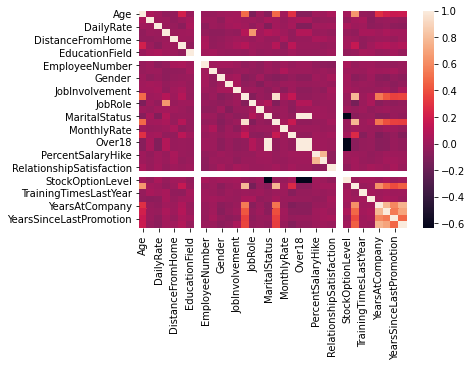

In [19]:
#Generating the correlation matrix
corr = df500_train_data.corr()
#Generating the correlation heat-map
sns.heatmap(corr)


In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False


In [21]:
result = pd.DataFrame()
result['Attrition'] = df500_train_data.iloc[:,0]


IndexError: ignored

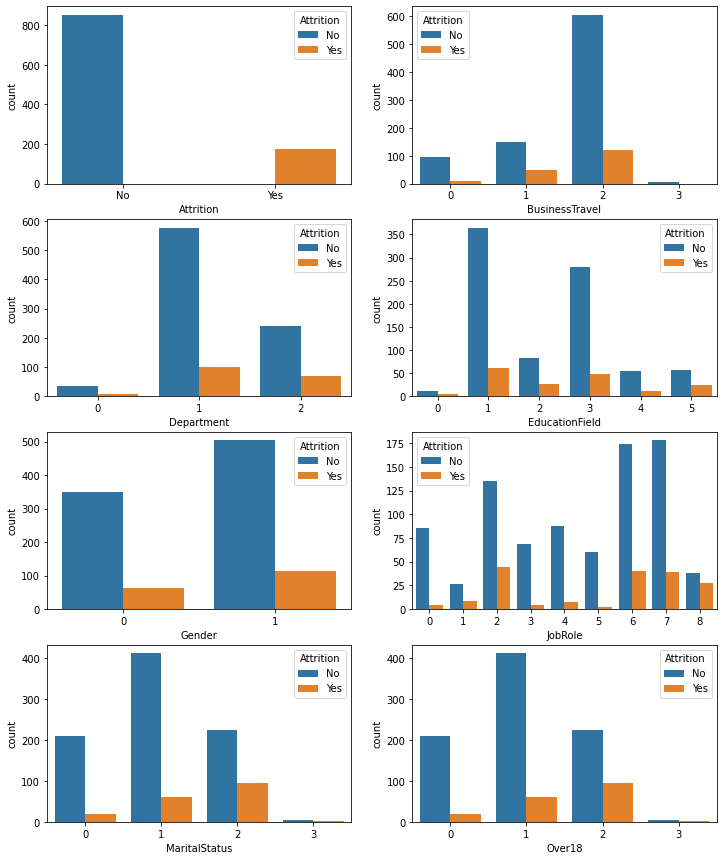

In [22]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df500_train_data,hue='Attrition',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [27]:
#Provide features for X and label for y
X = df500_train_data.drop('Attrition',axis=1)
y = df500_train_data['Attrition']
# Split the data into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)
#Initialize Random Forest Classifier
rfc = RandomForestClassifier()
#Fit model on the training Data
rfc.fit(X_train,y_train)
#Make prediction
predictions = rfc.predict(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print('lr accuracy :', lr.score(X_test,y_test))

# confusion matrix
y_pred = lr.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)


lr accuracy : 0.8411764705882353


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('knn accuracy :',knn.score(X_test,y_test))
# confisioun matrix
y_pred = knn.predict(X_test)
y_true = y_test

# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)


knn accuracy : 0.7794117647058824


Find best k value



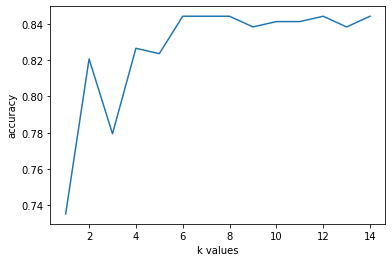

In [33]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()


In [ ]:
SVM

In [34]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
print('svm accuracy :', svm.score(X_test,y_test))

# confisuon matrix
y_pred = svm.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)


svm accuracy : 0.8411764705882353


In [ ]:
Naive Bayes



In [35]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
print('nb accuracy : ', nb.score(X_test,y_test))

# confisuon matrix
y_pred = nb.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)


nb accuracy :  0.7588235294117647


DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('dt.accuracy : ', nb.score(X_test,y_test))

# confisuon matrix
y_pred = dt.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)


dt.accuracy :  0.7588235294117647


RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print('rf accuracy : ', rf.score(X_test,y_test))

# confision matrix
y_pred = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)


rf accuracy :  0.8470588235294118


In [ ]:
Visualization Confision Matrix



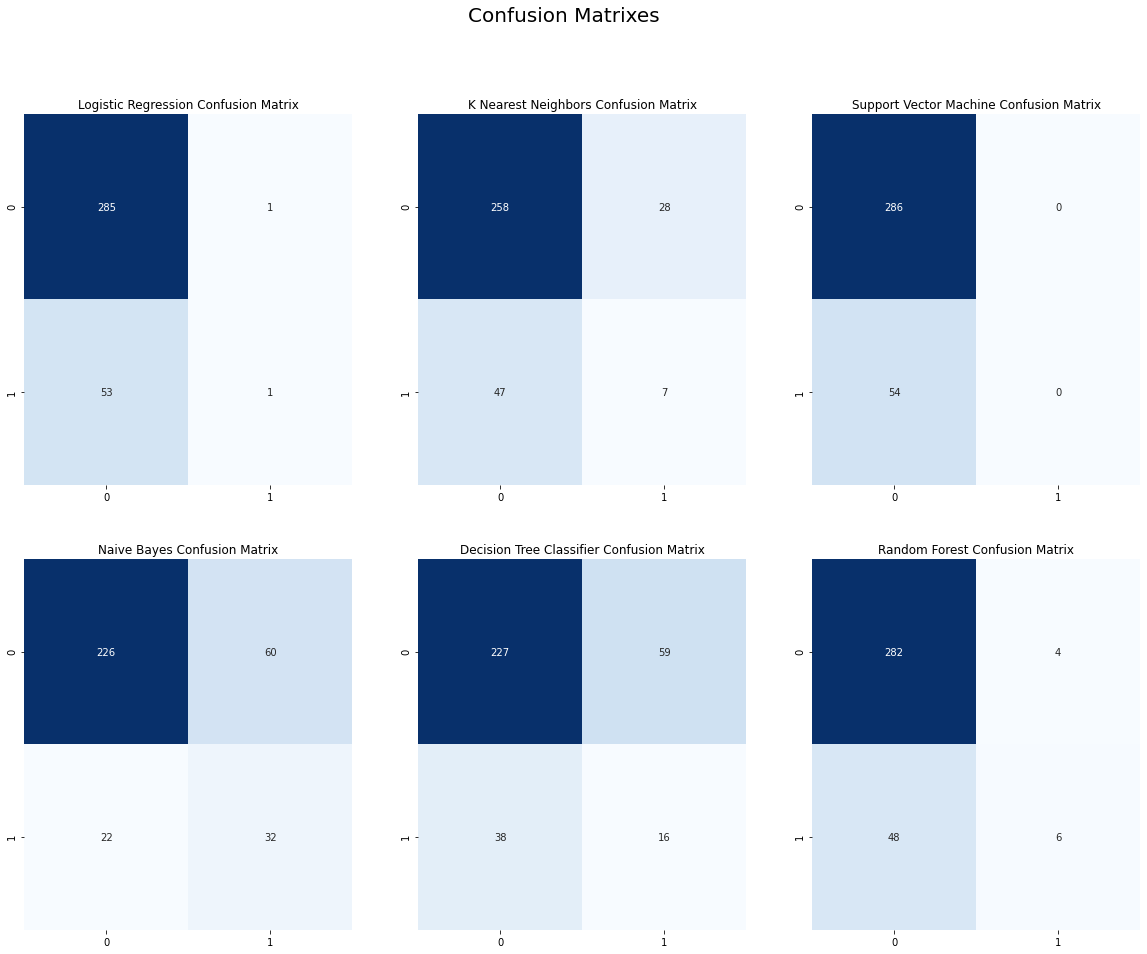

In [41]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Blues",fmt="d")

plt.show()


In [24]:
#Generate Confusion Matrix
conf_matrix = confusion_matrix(predictions,y_test)
print(conf_matrix)


[[282  48]
 [  4   6]]


In [25]:
#Lets calculate Precision, Recall and F1 score for label 0 and 1
#For Label 0
tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
fn = conf_matrix[0,1]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 0')
print('The precision for label 0 is: {0:.2f}'.format(precision))
print('The recall for label 0 is: {0:.2f}'.format(recall))
print('The f1-score for label 0 is: {0:.2f}'.format(f1_score))
print('\n')

#For Label 1 

tp = conf_matrix[1,1]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]

precision  = tp / (tp + fp)
recall     = tp / (tp + fn)
f1_score   = 2*( precision * recall)/(precision + recall)

print('precision, recall and f1-score for label 1')
print('The precision for label 1 is: {0:.2f}'.format(precision))
print('The recall for label 1 is: {0:.2f}'.format(recall))
print('The f1-score for label 1 is: {0:.2f}'.format(f1_score))


precision, recall and f1-score for label 0
The precision for label 0 is: 0.99
The recall for label 0 is: 0.85
The f1-score for label 0 is: 0.92


precision, recall and f1-score for label 1
The precision for label 1 is: 0.11
The recall for label 1 is: 0.60
The f1-score for label 1 is: 0.19


In [ ]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

          No       0.99      0.85      0.92       330
         Yes       0.11      0.60      0.19        10

    accuracy                           0.85       340
   macro avg       0.55      0.73      0.55       340
weighted avg       0.96      0.85      0.89       340

